In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code button"></form>''')

## Import IOS Zooplankton data and create dataframe

In [3]:
ls '/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'

'/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'


In [4]:
df=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [5]:
df1=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2012-2015 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [6]:
df2=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2016-2017 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [7]:
df3=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2018-2019 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [8]:
df

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Annelida,Polychaeta,NaN,NaN,Polychaeta *sp. trochophores s1,10.29412,0.11324,29,2.18,0.65
1,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. mysis s2,0.13787,0.04467,29,2.18,0.65
2,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Decapoda,Galatheidae,Munida *sp. megalops s2,0.04596,0.16544,29,2.18,0.65
3,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Euphausiacea,NaN,Euphausiidae *sp. eggs s1,19.11765,0.08603,29,2.18,0.65
4,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Euphausiacea,NaN,Euphausiidae *sp. nauplii s1,5.88235,0.00294,29,2.18,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52151,UVI2005000002001,Central Strait of Georgia,GEO1,Stratogem,-123.748,49.250,9/24/2005,12:15,Daylight,SCOR VNH,...,Mollusca,Bivalvia,Pholadomyoida,NaN,Bivalvia *sp. veligers s1,0.72276,0.00043,38,2.29,0.63
52152,UVI2005000002001,Central Strait of Georgia,GEO1,Stratogem,-123.748,49.250,9/24/2005,12:15,Daylight,SCOR VNH,...,Mollusca,Gastropoda,NaN,NaN,Gastropoda *sp. veligers s1,2.16827,0.00564,38,2.29,0.63
52153,UVI2005000002001,Central Strait of Georgia,GEO1,Stratogem,-123.748,49.250,9/24/2005,12:15,Daylight,SCOR VNH,...,Mollusca,Gastropoda,Gymnosomata,Clionidae,Clione limacina s2,0.04517,0.15810,38,2.29,0.63
52154,UVI2005000002001,Central Strait of Georgia,GEO1,Stratogem,-123.748,49.250,9/24/2005,12:15,Daylight,SCOR VNH,...,Mollusca,Gastropoda,Thecosomata,Limacinidae,Limacina helicina s0,4.33653,0.36861,38,2.29,0.63


In [9]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [10]:
df2.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

In [11]:
SoGDF=pd.concat([df,df1,df2,df3], ignore_index=True)

In [12]:
SoGDF

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Annelida,Polychaeta,NaN,NaN,Polychaeta *sp. trochophores s1,10.29412,0.11324,29,2.18,0.65
1,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. mysis s2,0.13787,0.04467,29,2.18,0.65
2,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Decapoda,Galatheidae,Munida *sp. megalops s2,0.04596,0.16544,29,2.18,0.65
3,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Euphausiacea,NaN,Euphausiidae *sp. eggs s1,19.11765,0.08603,29,2.18,0.65
4,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,Arthropoda,Malacostraca,Euphausiacea,NaN,Euphausiidae *sp. nauplii s1,5.88235,0.00294,29,2.18,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186269,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.250,4/6/2018,12:00,Daylight,Bongo VNH,...,Cnidaria,Hydrozoa,Siphonophorae,Diphyidae,Dimophyes arctica nectophore s2,0.14493,0.08551,61,2.65,0.64
186270,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.250,4/6/2018,12:00,Daylight,Bongo VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,9.27536,0.01206,61,2.65,0.64
186271,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.250,4/6/2018,12:00,Daylight,Bongo VNH,...,Mollusca,Cephalopoda,Octopoda,Octopodidae,Octopus rubescens larvae s1,0.01812,0.02174,61,2.65,0.64
186272,UBC9999099002001,Central Strait of Georgia,S4-1.5,Str. Geo.,-123.667,49.250,4/6/2018,12:00,Daylight,Bongo VNH,...,Mollusca,Gastropoda,NaN,NaN,Gastropoda *sp. veligers s1,2.31884,0.00603,61,2.65,0.64


In [13]:
SoGDF['Biomass(mg/m3)']

0         0.11324
1         0.04467
2         0.16544
3         0.08603
4         0.00294
           ...   
186269    0.08551
186270    0.01206
186271    0.02174
186272    0.00603
186273    0.78841
Name: Biomass(mg/m3), Length: 186274, dtype: float64

### Convert date to proper format

In [14]:
SoGDF['Date'][0],SoGDF['STN_TIME'][0]

('2/9/1995', '9:43')

In [15]:
SoGDF['Date'][1000:1020]

1000    1/31/1996
1001    1/31/1996
1002    1/31/1996
1003    1/31/1996
1004    1/31/1996
1005    1/31/1996
1006    1/31/1996
1007    1/31/1996
1008    1/31/1996
1009    1/31/1996
1010    1/31/1996
1011    1/31/1996
1012    1/31/1996
1013    1/31/1996
1014    1/31/1996
1015    1/31/1996
1016    1/31/1996
1017    1/31/1996
1018    1/31/1996
1019    1/31/1996
Name: Date, dtype: object

In [16]:
SoGDF['Date'][0].split('/')

['2', '9', '1995']

In [17]:
dateslist=list()

In [18]:
for el in SoGDF['Date']:
    dateslist.append(el.split('/'))

In [19]:
timeslist=list()
for el in SoGDF['STN_TIME']:
    timeslist.append(el.split(':'))

In [20]:
dts=list()
for ii,jj in zip(dateslist,timeslist):
    dts.append(dt.datetime(int(ii[2]),int(ii[0]),int(ii[1]),int(jj[0]),int(jj[1])))

In [21]:
df.loc[df.Twilight=='Daylight']['STN_TIME'].unique()

array(['9:43', '9:53', '13:13', '13:25', '18:00', '18:30', '17:03',
       '17:25', '15:28', '15:37', '17:59', '11:15', '11:32', '17:02',
       '17:24', '12:20', '12:40', '13:28', '18:06', '18:16', '11:55',
       '12:19', '17:04', '17:15', '21:25', '21:38', '13:37', '13:50',
       '16:55', '17:07', '19:30', '19:45', '11:40', '11:56', '12:10',
       '12:25', '15:03', '15:14', '12:52', '13:10', '10:27', '10:51',
       '14:43', '14:54', '9:20', '9:32', '12:00', '7:42', '8:01', '10:54',
       '11:02', '15:11', '14:55', '15:08', '17:17', '17:29', '13:06',
       '6:26', '7:22', '13:40', '13:51', '13:22', '13:36', '11:43',
       '11:53', '9:11', '3:39', '3:57', '9:36', '9:58', '10:12', '14:02',
       '14:16', '15:55', '16:25', '18:48', '22:06', '22:20', '18:05',
       '18:18', '10:13', '12:50', '17:54', '12:45', '16:16', '7:03',
       '9:48', '12:05', '18:40', '15:51', '12:53', '17:00', '11:47',
       '16:11', '16:30', '12:15', '18:50', '15:47', '12:57', '13:54',
       '17:37', '

In [22]:
SoGDF['dtUTC']=et.pac_to_utc(dts) #convert from Pac time to UTC

In [23]:
dtsutc=et.pac_to_utc(dts)

In [24]:
SoGDF.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC'],
      dtype='object')

In [25]:
SoGDF['Family:'].unique()

array([nan, 'Galatheidae', 'Euphausiidae', 'Acartiidae', 'Calanidae',
       'Clausocalanidae', 'Eucalanidae', 'Paracalanidae', 'Pontellidae',
       'Oithonidae', 'Corycaeidae', 'Halocyprididae', 'Sagittidae',
       'Eukrohniidae', 'Oikopleuridae', 'Campanulariidae',
       'Rhopalonematidae', 'Hyperiidae', 'Fritillaridae', 'Mysidae',
       'Euchaetidae', 'Scolecitrichidae', 'Tortanidae', 'Pandalidae',
       'Metridinidae', 'Globigerinidae', 'Tomopteridae', 'Clionidae',
       'Polynoidae', 'Spionidae', 'Crangonidae', 'Paguridae', 'Diphyidae',
       'Limacinidae', 'Podonidae', 'Centropagidae', 'Proboscidactylidae',
       'Hippolytidae', 'Pandeidae', 'Pleurobrachiidae', 'Syllidae',
       'Atlantidae', 'Oncaeidae', 'Cyphocarididae', 'Mitrocomidae',
       'Aetideidae', 'Ectinosomatidae', 'Spinocalanidae', 'Caligidae',
       'Cuninidae', 'Corynidae', 'Typhloscolecidae', 'Porcellanidae',
       'Campanulinidae', 'Oweniidae', 'Doliolidae', 'Aequoreidae',
       'Sergestidae', 'Agoni

In [26]:
#create new columns
SoGDF['Year']=[ii.year for ii in SoGDF['dtUTC']]
SoGDF['Month']=[ii.month for ii in SoGDF['dtUTC']]
SoGDF['YD']=et.datetimeToYD(SoGDF['dtUTC'])
SoGDF['YMo']=SoGDF['dtUTC'].dt.strftime('%Y-%m')

In [27]:
SoGDF['YMo'].astype ##YMo is an object not int64 like other date columns (fix this)

<bound method NDFrame.astype of 0         1995-02
1         1995-02
2         1995-02
3         1995-02
4         1995-02
           ...   
186269    2018-04
186270    2018-04
186271    2018-04
186272    2018-04
186273    2018-04
Name: YMo, Length: 186274, dtype: object>

### Take a look at which Euphausiid species have the highest biomass in different regions

In [28]:
PreMHWEuphs=SoGDF.loc[(SoGDF['Family:']=='Euphausiidae')&(SoGDF['Year']<2014)]
MHWEuphs=SoGDF.loc[(SoGDF['Family:']=='Euphausiidae')&(SoGDF['Year']>=2014)&(SoGDF['Year']<=2017)]
PostMHWEuphs=SoGDF.loc[(SoGDF['Family:']=='Euphausiidae')&(SoGDF['Year']>2017)]

In [29]:
PreMHWEuphs

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability,dtUTC,Year,Month,YD,YMo
6,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,0.18382,1.56250,29,2.18,0.65,1995-02-09 17:43:00,1995,2,40,1995-02
7,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,0.13787,0.89063,29,2.18,0.65,1995-02-09 17:43:00,1995,2,40,1995-02
8,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,0.18382,0.11949,29,2.18,0.65,1995-02-09 17:43:00,1995,2,40,1995-02
9,IOS1995003000301,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.267,2/9/1995,9:43,Daylight,Bongo VNH,...,0.55147,1.93015,29,2.18,0.65,1995-02-09 17:43:00,1995,2,40,1995-02
53,IOS1995003000401,Tidal Mixed,JDF,Juan de Fuca,-123.417,48.269,2/9/1995,9:53,Daylight,Bongo VNH,...,0.12563,0.43970,23,2.48,0.79,1995-02-09 17:53:00,1995,2,40,1995-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98887,PBS2013045000801,Central Strait of Georgia,GS02,Str. Geo.,-123.451,49.001,6/25/2013,15:28,Daylight,Bongo VNH,...,0.47492,4.03681,56,2.61,0.65,2013-06-25 22:28:00,2013,6,176,2013-06
98888,PBS2013045000801,Central Strait of Georgia,GS02,Str. Geo.,-123.451,49.001,6/25/2013,15:28,Daylight,Bongo VNH,...,2.13713,1.38914,56,2.61,0.65,2013-06-25 22:28:00,2013,6,176,2013-06
98889,PBS2013045000801,Central Strait of Georgia,GS02,Str. Geo.,-123.451,49.001,6/25/2013,15:28,Daylight,Bongo VNH,...,1.89967,0.30395,56,2.61,0.65,2013-06-25 22:28:00,2013,6,176,2013-06
98890,PBS2013045000801,Central Strait of Georgia,GS02,Str. Geo.,-123.451,49.001,6/25/2013,15:28,Daylight,Bongo VNH,...,0.11873,0.10329,56,2.61,0.65,2013-06-25 22:28:00,2013,6,176,2013-06


### Juan de Fuca

In [30]:
PreMHWEuphs.loc[PreMHWEuphs['region_name']=='Juan de Fuca',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(10)

,Name,Biomass(mg/m3)
7,Thysanoessa raschii F,16.018654
9,Thysanoessa spinifera F,2.871650
12,Thysanoessa spinifera s3,2.640140
6,Thysanoessa inspinata F,1.865210
0,Euphausia pacifica F,1.480790
10,Thysanoessa spinifera M,1.462405
2,Euphausia pacifica s2,1.314776
1,Euphausia pacifica M,1.130760
8,Thysanoessa raschii s2,0.678300
3,Euphausia pacifica eggs s1,0.117856


In [31]:
MHWEuphs.loc[MHWEuphs['region_name']=='Juan de Fuca',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(10)

,Name,Biomass(mg/m3)
11,Thysanoessa raschii F,84.901020
0,Euphausia pacifica F,8.442974
14,Thysanoessa spinifera F,6.606000
1,Euphausia pacifica M,3.667673
9,Thysanoessa inspinata F,1.829370
17,Thysanoessa spinifera s3,1.422705
13,Thysanoessa raschii s2,1.399314
12,Thysanoessa raschii M,1.271615
15,Thysanoessa spinifera M,0.675137
6,Nematoscelis difficilis M,0.565770


In [32]:
PostMHWEuphs.loc[PostMHWEuphs['region_name']=='Juan de Fuca',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(10)

,Name,Biomass(mg/m3)
4,Thysanoessa raschii F,68.406055
1,Euphausia pacifica M,2.659975
0,Euphausia pacifica F,2.242142
5,Thysanoessa raschii M,2.164160
7,Thysanoessa spinifera F,2.140450
8,Thysanoessa spinifera M,1.914860
6,Thysanoessa raschii s2,0.876900
3,Nematoscelis difficilis F,0.372180
2,Euphausia pacifica s2,0.251030
9,Thysanoessa spinifera s2,0.111650


In [33]:
## Nematoscelis difficilis is a warmer water species typical of the California Current?? see Lavaniegos et al. 2019
## Nematoscelis difficilis <22 mm body size
SoGDF.loc[SoGDF.Name.str.contains('Nematoscelis'),['region_name','Year','Name','Biomass(mg/m3)']].groupby(['region_name','Year','Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(20)

,region_name,Year,Name,Biomass(mg/m3)
18,Northern Strait of Georgia,2000,Nematoscelis difficilis s2,1.664865
2,Central Strait of Georgia,2000,Nematoscelis difficilis s2,0.889500
14,Juan de Fuca,2016,Nematoscelis difficilis M,0.565770
23,Northern Strait of Georgia,2016,Nematoscelis difficilis M,0.477710
16,Juan de Fuca,2017,Nematoscelis difficilis F,0.445680
7,Central Strait of Georgia,2017,Nematoscelis difficilis F,0.390110
13,Juan de Fuca,2016,Nematoscelis difficilis F,0.383380
28,Tidal Mixed,1998,Nematoscelis difficilis F,0.376220
17,Juan de Fuca,2018,Nematoscelis difficilis F,0.372180
29,Tidal Mixed,1998,Nematoscelis difficilis M,0.370480


### Central SoG

In [34]:
PreMHWEuphs.loc[PreMHWEuphs['region_name']=='Central Strait of Georgia',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(20)

,Name,Biomass(mg/m3)
3,Euphausia pacifica s3,27.733303
0,Euphausia pacifica F,10.263998
25,Thysanoessa spinifera F,4.077811
2,Euphausia pacifica s2,3.276435
11,Thysanoessa *sp. s1,3.186170
17,Thysanoessa longipes F,2.101932
6,Euphausia pacifica zoea s1,1.944071
28,Thysanoessa spinifera s3,1.792929
1,Euphausia pacifica M,1.703801
21,Thysanoessa raschii F,1.027346


In [35]:
MHWEuphs.loc[MHWEuphs['region_name']=='Central Strait of Georgia',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(20)

,Name,Biomass(mg/m3)
0,Euphausia pacifica F,6.687099
23,Thysanoessa spinifera F,3.902407
2,Euphausia pacifica s2,3.521782
15,Thysanoessa longipes F,2.513535
6,Euphausia pacifica zoea s1,1.761496
1,Euphausia pacifica M,1.635085
26,Thysanoessa spinifera s3,1.506155
3,Euphausia pacifica s3,1.090446
11,Thysanoessa *sp. s1,0.946510
19,Thysanoessa longipes zoea s1,0.745830


In [36]:
PostMHWEuphs.loc[PostMHWEuphs['region_name']=='Central Strait of Georgia',['Name','Biomass(mg/m3)']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['Biomass(mg/m3)'],ascending=False).head(20)

,Name,Biomass(mg/m3)
0,Euphausia pacifica F,8.732835
2,Euphausia pacifica s2,4.379065
3,Euphausia pacifica s3,4.195713
24,Thysanoessa spinifera s3,3.042786
5,Euphausia pacifica juvenile s2,2.614063
7,Euphausia pacifica zoea s1,2.496392
17,Thysanoessa longipes zoea s1,1.413465
21,Thysanoessa spinifera F,1.361360
1,Euphausia pacifica M,0.903833
10,Thysanoessa *sp. s1,0.649055


In [37]:
### Central and Northern SoG can be combined because the zooplankton communities are very similar

Central=SoGDF.loc[SoGDF['region_name']=='Central Strait of Georgia']
JdF=SoGDF.loc[SoGDF['region_name']=='Juan de Fuca']
Northern=SoGDF.loc[SoGDF['region_name']=='Northern Strait of Georgia']
MainSoG=SoGDF.loc[(SoGDF['region_name']=='Central Strait of Georgia')|(SoGDF['region_name']=='Northern Strait of Georgia')]

## Examine timeseries of Euphausiid species in the Main SoG (Central & Northern SoG)

In [38]:
Euphs=MainSoG.loc[(SoGDF['Family:']=='Euphausiidae')]

In [39]:
for row in Euphs.Name.unique():
    print(row)
    
##Euphausia pacifica, Thysanoessa raschii,Thysanoessa spinifera, Tessarabrachion oculatum,Thysanoessa longipes,\
## Thysanoessa inspinata, Nematoscelis difficilis,Thysanoessa inermis


Euphausia pacifica  F
Thysanoessa longipes  F
Thysanoessa longipes  M
Thysanoessa longipes  s2
Euphausia pacifica  M
Thysanoessa spinifera  F
Thysanoessa raschii  F
Euphausia pacifica  s2
Euphausia pacifica  s3
Euphausia pacifica zoea s1
Nematoscelis difficilis  F
Thysanoessa inspinata  s2
Thysanoessa spinifera  s2
Thysanoessa spinifera  s3
Nematoscelis *sp.  s2
Thysanoessa longipes  s3
Nematoscelis difficilis  s2
Thysanoessa spinifera  M
Euphausia pacifica eggs s1
Thysanoessa raschii  M
Thysanoessa spinifera eggs s1
Thysanoessa spinifera nauplii s1
Euphausia pacifica nauplii s1
Thysanoessa raschii  s2
Thysanoessa inermis  s2
Nematoscelis difficilis  s3
Thysanoessa longipes zoea s1
Thysanoessa raschii  s3
Thysanoessa inspinata  F
Tessarabrachion oculatum  F
Thysanoessa inspinata  M
Thysanoessa *sp.  s1
Thysanoessa *sp.  s2
Thysanoessa *sp. nauplii s1
Thysanoessa spinifera zoea s1
Thysanoessa *sp. zoea s1
Nematoscelis difficilis  M
Thysanoessa inspinata  s3
Tessarabrachion oculatum  M
E

In [40]:
SoGEupa=MainSoG.loc[MainSoG.Name.str.contains('Euphausia pacifica'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

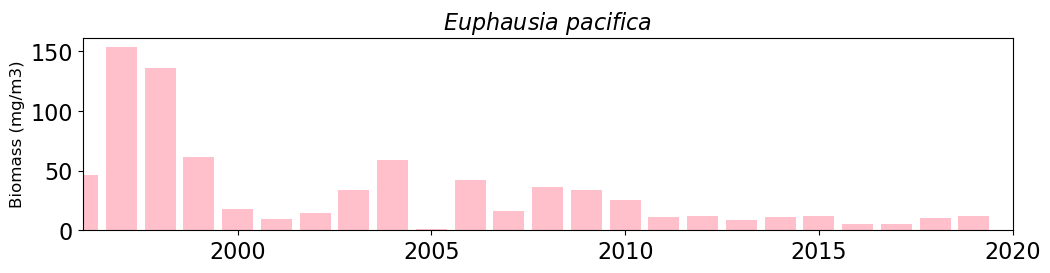

In [41]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGEupa['Year'],(SoGEupa['Biomass(mg/m3)']),color='pink',label='')
ax.set_title('$\it{Euphausia}$ $\it{pacifica}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [42]:
SoGThysra=MainSoG.loc[MainSoG.Name.str.contains('Thysanoessa raschii'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

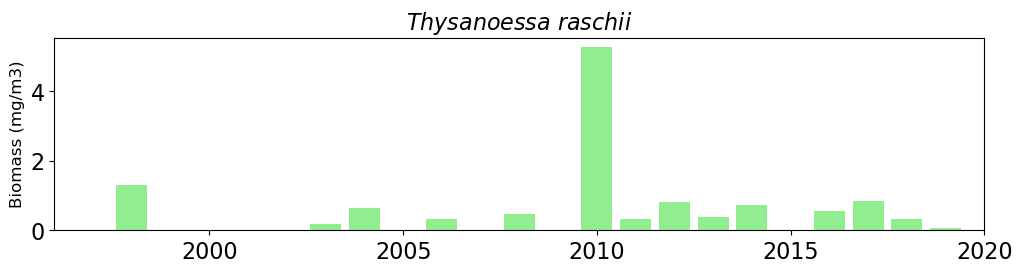

In [43]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGThysra['Year'],(SoGThysra['Biomass(mg/m3)']),color='lightgreen',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{raschii}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [44]:
SoGThyspin=MainSoG.loc[MainSoG.Name.str.contains('Thysanoessa spinifera'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

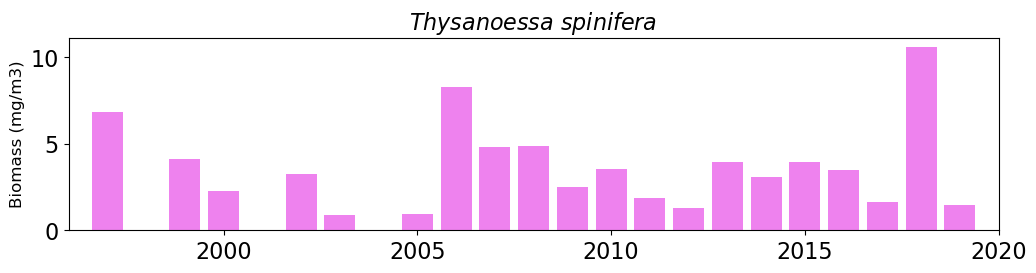

In [45]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGThyspin['Year'],(SoGThyspin['Biomass(mg/m3)']),color='violet',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{spinifera}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [46]:
SoGThyslong=MainSoG.loc[MainSoG.Name.str.contains('Thysanoessa longipes'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

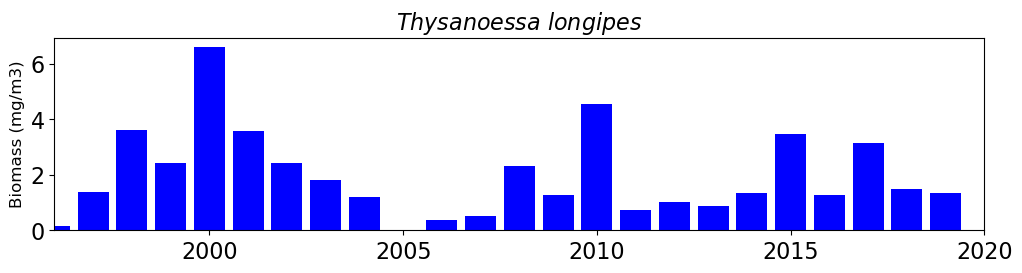

In [47]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGThyslong['Year'],(SoGThyslong['Biomass(mg/m3)']),color='blue',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{longipes}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [48]:
#Thysanoessa inspinata

In [49]:
SoGThysin=MainSoG.loc[MainSoG.Name.str.contains('Thysanoessa inspinata'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

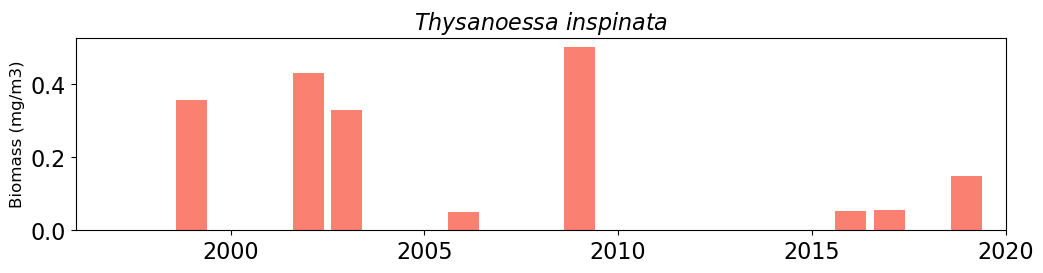

In [50]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGThysin['Year'],(SoGThysin['Biomass(mg/m3)']),color='salmon',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{inspinata}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [51]:
#Thysanoessa inermis

In [52]:
SoGThysiner=MainSoG.loc[MainSoG.Name.str.contains('Thysanoessa inermis'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

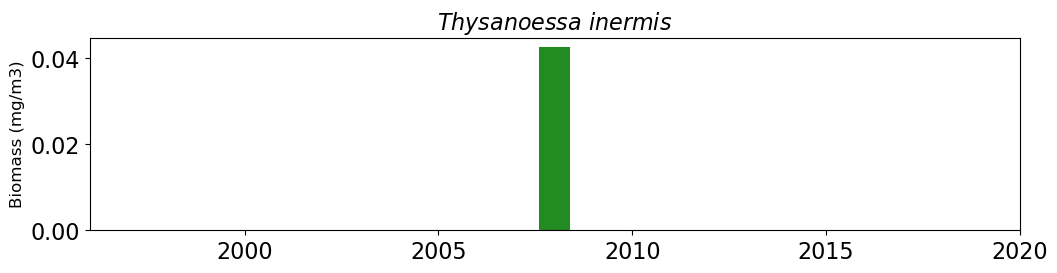

In [53]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGThysiner['Year'],(SoGThysiner['Biomass(mg/m3)']),color='forestgreen',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{inermis}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [54]:
SoGNemato=MainSoG.loc[MainSoG.Name.str.contains('Nematoscelis'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

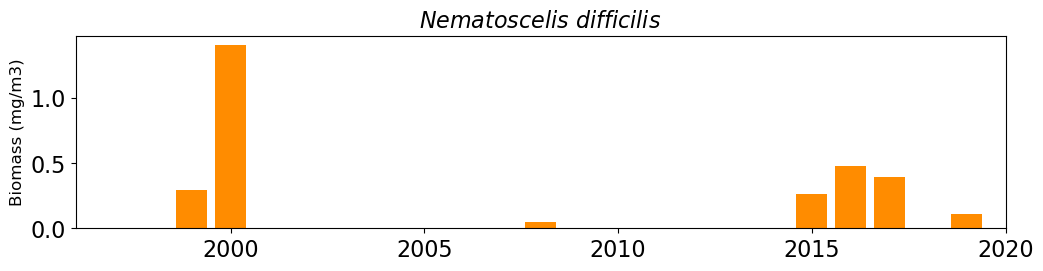

In [55]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGNemato['Year'],(SoGNemato['Biomass(mg/m3)']),color='darkorange',label='Model Microzoop')
ax.set_title('$\it{Nematoscelis}$ $\it{difficilis}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [56]:
SoGTess=MainSoG.loc[MainSoG.Name.str.contains('Tessarabrachion oculatum'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

In [57]:
SoGTess

,Year,Name,Biomass(mg/m3)
0,2010,Tessarabrachion oculatum F,0.218750
1,2013,Tessarabrachion oculatum F,0.194660
2,2015,Tessarabrachion oculatum F,0.161110
3,2017,Tessarabrachion oculatum F,0.204315
4,2018,Tessarabrachion oculatum M,0.062610


(1996.0, 2020.0)

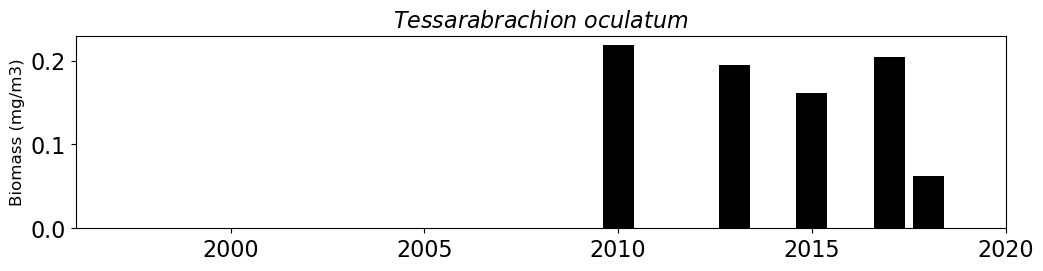

In [58]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(SoGTess['Year'],(SoGTess['Biomass(mg/m3)']),color='black',label='Model Microzoop')
ax.set_title('$\it{Tessarabrachion}$ $\it{oculatum}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

## Examine timeseries of Euphausiid species in Juan de Fuca Strait

In [59]:
EuphsJdF=JdF.loc[(SoGDF['Family:']=='Euphausiidae')]

In [60]:
for row in EuphsJdF.Name.unique():
    print(row)
    
##Euphausia pacifica, Thysanoessa raschii,Thysanoessa spinifera, Tessarabrachion oculatum,Thysanoessa longipes,\
## Thysanoessa inspinata, Nematoscelis difficilis,Thysanoessa inermis


Euphausia pacifica  F
Euphausia pacifica  M
Thysanoessa inspinata  F
Thysanoessa raschii  F
Thysanoessa spinifera  F
Euphausia pacifica  s2
Euphausia pacifica eggs s1
Thysanoessa spinifera  M
Thysanoessa spinifera  s2
Thysanoessa spinifera eggs s1
Euphausia pacifica nauplii s1
Thysanoessa spinifera nauplii s1
Euphausia pacifica zoea s1
Thysanoessa raschii  s2
Thysanoessa spinifera  s3
Nematoscelis difficilis  F
Nematoscelis difficilis  M
Nematoscelis difficilis  s2
Thysanoessa raschii  M
Thysanoessa inspinata  M
Tessarabrachion oculatum  F


In [61]:
JdFEupa=JdF.loc[JdF.Name.str.contains('Euphausia pacifica'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

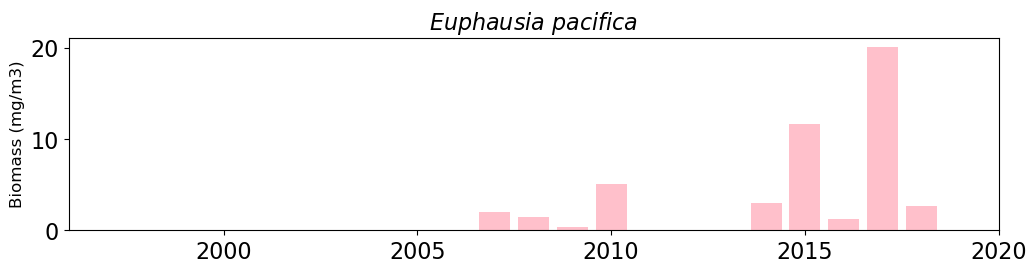

In [62]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFEupa['Year'],(JdFEupa['Biomass(mg/m3)']),color='pink',label='')
ax.set_title('$\it{Euphausia}$ $\it{pacifica}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [63]:
JdFThysra=JdF.loc[JdF.Name.str.contains('Thysanoessa raschii'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

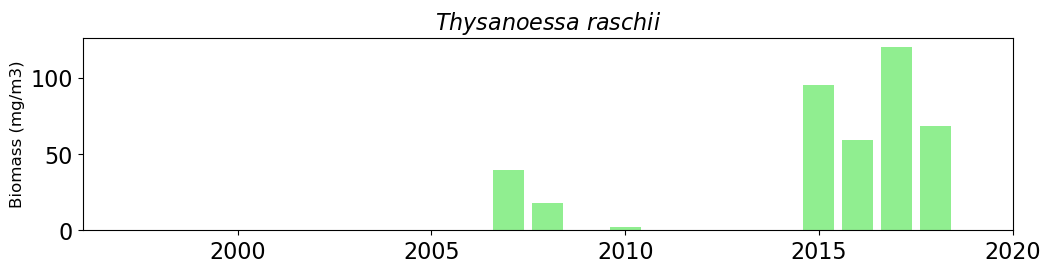

In [64]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFThysra['Year'],(JdFThysra['Biomass(mg/m3)']),color='lightgreen',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{raschii}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [65]:
JdFThyspin=JdF.loc[JdF.Name.str.contains('Thysanoessa spinifera'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

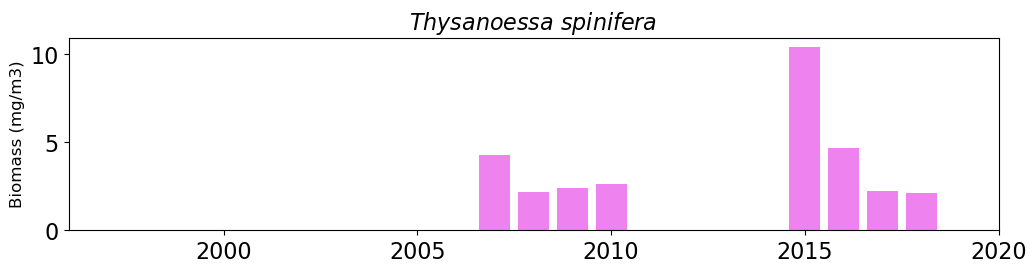

In [66]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFThyspin['Year'],(JdFThyspin['Biomass(mg/m3)']),color='violet',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{spinifera}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [67]:
#Thysanoessa inspinata

In [68]:
JdFThysin=JdF.loc[JdF.Name.str.contains('Thysanoessa inspinata'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

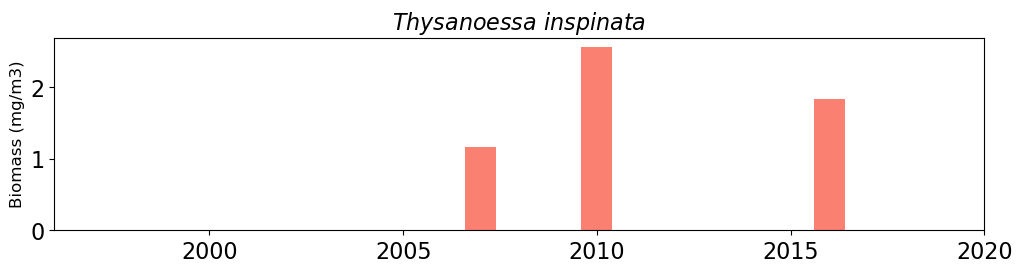

In [69]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFThysin['Year'],(JdFThysin['Biomass(mg/m3)']),color='salmon',label='')
ax.set_title('$\it{Thysanoessa}$ $\it{inspinata}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [70]:
JdFNemato=JdF.loc[JdF.Name.str.contains('Nematoscelis'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

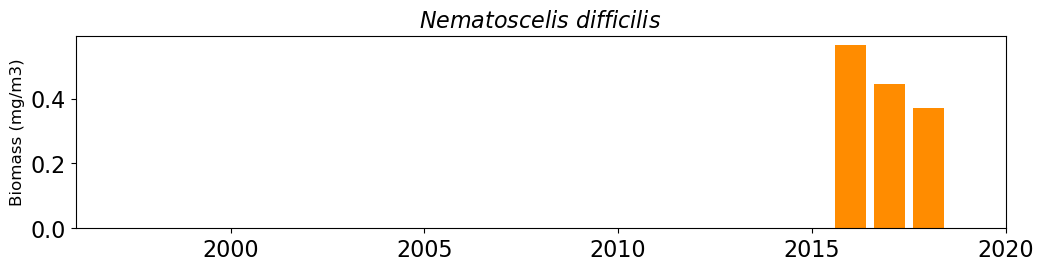

In [71]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFNemato['Year'],(JdFNemato['Biomass(mg/m3)']),color='darkorange',label='Model Microzoop')
ax.set_title('$\it{Nematoscelis}$ $\it{difficilis}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)

In [72]:
JdFTess=JdF.loc[JdF.Name.str.contains('Tessarabrachion oculatum'),['Year','Name','Biomass(mg/m3)']].groupby(['Year','Name'],as_index=False)\
        .mean()

(1996.0, 2020.0)

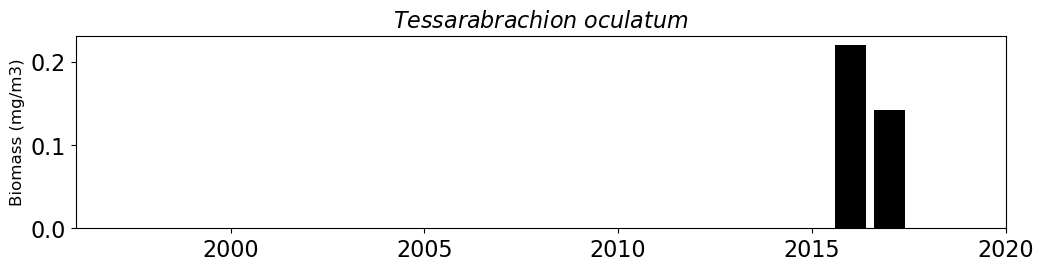

In [73]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
x=range(1996,2019)
plt.bar(JdFTess['Year'],(JdFTess['Biomass(mg/m3)']),color='black',label='Model Microzoop')
ax.set_title('$\it{Tessarabrachion}$ $\it{oculatum}$')
ax.set_ylabel('Biomass (mg/m3)',fontsize=12)
ax.set_xlim(1996,2020)